In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [11]:
DATADIR = 'Dataset2'

IMAGE_SIZE = [128, 128]
 
train_path = DATADIR+'/train'
valid_path = DATADIR+'/test'

In [12]:
labels = ['2S1','BRDM_2','BTR_60','D7','SLICY','T62','ZIL131','ZSU_23_4']

In [13]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], 
              weights='imagenet',
              include_top=False)

In [14]:
for layer in vgg19.layers:
    layer.trainable = False

In [15]:
num_classes = glob("Dataset2/train/*")
num_classes

print(len(num_classes))

8


In [16]:
x = Flatten()(vgg19.output)
prediction = Dense(len(num_classes), activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [17]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
  )

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   )
 
test_datagen = ImageDataGenerator(rescale = 1./255
                                  )
 
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (IMAGE_SIZE),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
 
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (IMAGE_SIZE),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6623 images belonging to 8 classes.
Found 953 images belonging to 8 classes.


In [19]:
history = model.fit(
    training_set,
    validation_data = test_set,
    epochs=50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/50
207/207 [==============================] - 44s 196ms/step - loss: 1.1279 - accuracy: 0.5846 - val_loss: 0.9013 - val_accuracy: 0.6663
Epoch 2/50
207/207 [==============================] - 36s 175ms/step - loss: 0.7597 - accuracy: 0.7281 - val_loss: 0.7515 - val_accuracy: 0.7282
Epoch 3/50
207/207 [==============================] - 32s 154ms/step - loss: 0.6244 - accuracy: 0.7864 - val_loss: 0.6439 - val_accuracy: 0.7324
Epoch 4/50
207/207 [==============================] - 32s 153ms/step - loss: 0.5459 - accuracy: 0.8150 - val_loss: 0.5979 - val_accuracy: 0.7692
Epoch 5/50
207/207 [==============================] - 32s 152ms/step - loss: 0.5056 - accuracy: 0.8300 - val_loss: 0.5070 - val_accuracy: 0.8374
Epoch 6/50
207/207 [==============================] - 32s 154ms/step - loss: 0.4659 - accuracy: 0.8427 - val_loss: 0.5670 - val_accuracy: 0.7859
Epoch 7/50
207/207 [==============================] - 32s 153ms/step - loss: 0.4250 - accuracy: 0.8557 - val_loss: 0.5033 - val_ac

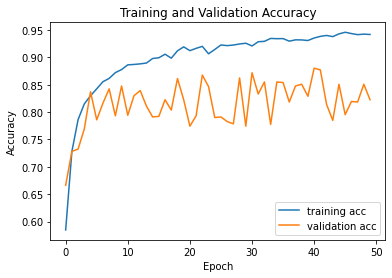

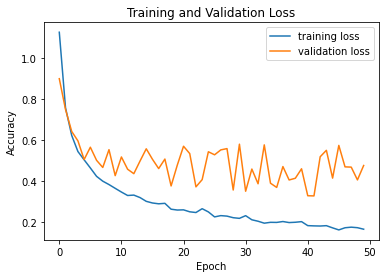

In [20]:
import matplotlib.pyplot as plt
# plot the accuracy
plt.plot(history.history['accuracy'], label='training acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')
 
# plot the loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

In [21]:
model.evaluate(test_set)

30/30 [==============================] - 2s 64ms/step - loss: 0.4779 - accuracy: 0.8227


[0.47789889574050903, 0.822665274143219]

In [10]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

In [11]:
def create_model():
    vgg19 = VGG19(input_shape=[img_size,img_size]+[3], weights='imagenet', include_top=False)
    for layer in vgg19.layers:
        layer.trainable = False
#     x = Conv2D(64, (3,3), padding='same', activation='relu')(vgg19.input)
#     x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
    
    x = Flatten()(vgg19.output)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    prediction = Dense(8, activation='softmax')(x)
    # create a model object
    model = Model(inputs=vgg19.input, outputs=prediction)
    return model

In [12]:
# vgg19 = VGG19(input_shape=[img_size,img_size]+[3], weights='imagenet', include_top=False)

In [13]:
# don't train existing weights
# for layer in vgg19.layers:
#     layer.trainable = False

In [14]:
# our layers - you can add more if you want
# x = Flatten()(vgg19.output)

In [15]:
# prediction = Dense(8, activation='softmax')(x)

# create a model object
# model = Model(inputs=vgg19.input, outputs=prediction)

In [16]:
# model = create_model()
# model.summary()

In [17]:
# # Building the Model Architecture
# model = Sequential()


# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(512, kernel_size=(1, 1), activation='relu'))
# model.add(Conv2D(512, kernel_size=(1, 1), activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))

# model.add(Conv2D(512, kernel_size=(1, 1), activation='relu'))
# model.add(Conv2D(512, kernel_size=(1, 1), activation='relu'))
# model.add(Conv2D(512, kernel_size=(1, 1), activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))

# model.add(Flatten())
# model.add(Dense(4000,activation="relu"))
# model.add(Dense(1000,activation="relu"))
# model.add(Dense(100,activation="relu"))
# model.add(Dense(8, activation="sigmoid"))

In [18]:
model = create_model()
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.000001),
    metrics=['accuracy']    
)

model.summary()


train_ds=tf.data.Dataset.from_tensor_slices((x_train,y_train))
test_ds=tf.data.Dataset.from_tensor_slices((x_val,y_val))

def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image,label



train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=64,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=64,drop_remainder=True)
         )

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

C:\Users\Chlangdiam Sumer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Train size: 6623
Test size: 953


In [19]:
from keras.optimizers import Adam
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

C:\Users\Chlangdiam Sumer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

Epoch 1/100


C:\Users\Chlangdiam Sumer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


207/207 [==============================] - 19s 45ms/step - loss: 2.1208 - accuracy: 0.1495 - val_loss: 2.0930 - val_accuracy: 0.1490
Epoch 2/100
207/207 [==============================] - 7s 32ms/step - loss: 2.0642 - accuracy: 0.1496 - val_loss: 2.0444 - val_accuracy: 0.1501
Epoch 3/100
207/207 [==============================] - 7s 32ms/step - loss: 2.0254 - accuracy: 0.1504 - val_loss: 2.0093 - val_accuracy: 0.1501
Epoch 4/100
207/207 [==============================] - 7s 32ms/step - loss: 1.9948 - accuracy: 0.1530 - val_loss: 1.9784 - val_accuracy: 0.1731
Epoch 5/100
207/207 [==============================] - 7s 32ms/step - loss: 1.9665 - accuracy: 0.1797 - val_loss: 1.9487 - val_accuracy: 0.2162
Epoch 6/100
207/207 [==============================] - 7s 32ms/step - loss: 1.9396 - accuracy: 0.2124 - val_loss: 1.9208 - val_accuracy: 0.2508
Epoch 7/100
207/207 [==============================] - 7s 32ms/step - loss: 1.9144 - accuracy: 0.2491 - val_loss: 1.8951 - val_accuracy: 0.2697
Epo

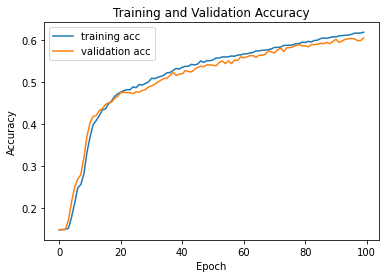

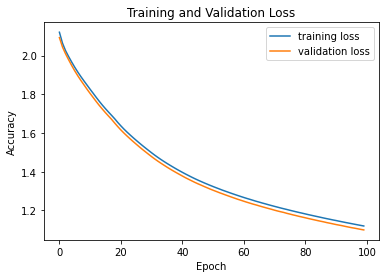

In [21]:
import matplotlib.pyplot as plt
# plot the accuracy
plt.plot(history.history['accuracy'], label='training acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')
 
# plot the loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

In [22]:
model.evaluate(x_val, y_val)

30/30 [==============================] - 1s 28ms/step - loss: 1.0993 - accuracy: 0.6055


[1.0992614030838013, 0.6054564714431763]